In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
keras.__version__

'2.6.0'

In [ ]:
digit_mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = digit_mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


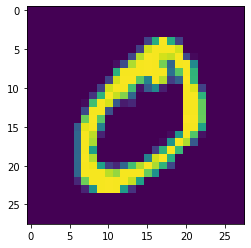

In [ ]:
plt.imshow(X_train_full[1])

In [ ]:
y_train_full[1]

0

In [ ]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

In [ ]:
class_names[y_train_full[1]]

'0'

**DATA NORMALIZATION**


In [ ]:
X_train_n = X_train_full/255.0
X_test_n = X_test/255.0

In [ ]:
X_valid, X_train = X_train_n[:6000], X_train_n[6000:]
y_valid, y_train = y_train_full[:6000], y_train_full[6000:]
X_test = X_test_n

In [ ]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model  = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(200, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


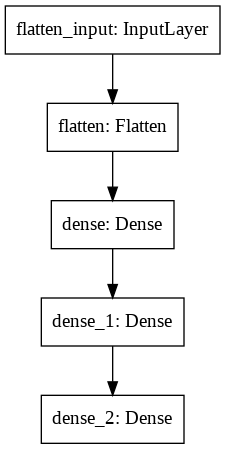

In [ ]:
import pydot
keras.utils.plot_model(model)

In [ ]:
weights, biases = model.layers[1].get_weights()

In [ ]:
weights

array([[ 0.02570029, -0.00921319, -0.02297589, ...,  0.03759523,
         0.01990343, -0.00419658],
       [ 0.0493257 ,  0.07532704,  0.04591972, ...,  0.01272719,
         0.07017377,  0.06893378],
       [-0.00902112,  0.0490617 ,  0.01508749, ...,  0.00632862,
        -0.02900814, -0.04371899],
       ...,
       [ 0.06044598,  0.02830634,  0.04788385, ..., -0.02156743,
        -0.06206664, -0.06688078],
       [ 0.03822813,  0.07278952,  0.02177001, ..., -0.04696669,
        -0.04292265,  0.0316055 ],
       [-0.01534326, -0.03178874, -0.04308994, ...,  0.00643031,
         0.02572545, -0.03443564]], dtype=float32)

In [ ]:
weights.shape

(784, 200)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
biases.shape

(200,)

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [ ]:
model_history = model.fit(X_train, y_train, epochs = 60,
                          validation_data = (X_valid, y_valid))

Epoch 1/60
1688/1688 [==============================] - 6s 3ms/step - loss: 0.6607 - accuracy: 0.8267 - val_loss: 0.3216 - val_accuracy: 0.9125
Epoch 2/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3006 - accuracy: 0.9141 - val_loss: 0.2585 - val_accuracy: 0.9283
Epoch 3/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2488 - accuracy: 0.9292 - val_loss: 0.2254 - val_accuracy: 0.9383
Epoch 4/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2151 - accuracy: 0.9390 - val_loss: 0.1961 - val_accuracy: 0.9442
Epoch 5/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1893 - accuracy: 0.9461 - val_loss: 0.1790 - val_accuracy: 0.9485
Epoch 6/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1690 - accuracy: 0.9517 - val_loss: 0.1637 - val_accuracy: 0.9523
Epoch 7/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1521 - accuracy: 0.9569 - val_loss: 0.1482 - val_accuracy:

In [ ]:
model_history.params

{'epochs': 60, 'steps': 1688, 'verbose': 1}

In [ ]:
model_history.history

{'accuracy': [0.8267222046852112,
  0.9140740633010864,
  0.9292222261428833,
  0.9390000104904175,
  0.9461296200752258,
  0.9517407417297363,
  0.9569073915481567,
  0.9611111283302307,
  0.964129626750946,
  0.9672777652740479,
  0.9697592854499817,
  0.9723703861236572,
  0.9746851921081543,
  0.9765740633010864,
  0.9777407646179199,
  0.9793333411216736,
  0.9809814691543579,
  0.9819074273109436,
  0.9829444289207458,
  0.9841481447219849,
  0.9850925803184509,
  0.9859814643859863,
  0.9864814877510071,
  0.987407386302948,
  0.988444447517395,
  0.9888333082199097,
  0.9893703460693359,
  0.9902222156524658,
  0.9907222390174866,
  0.9915555715560913,
  0.9920555353164673,
  0.9926851987838745,
  0.9931296110153198,
  0.9937777519226074,
  0.9941296577453613,
  0.9946296215057373,
  0.9944815039634705,
  0.9953703880310059,
  0.9958703517913818,
  0.9960926175117493,
  0.9967963099479675,
  0.9969074130058289,
  0.9971481561660767,
  0.9972777962684631,
  0.9976666569709778,
 

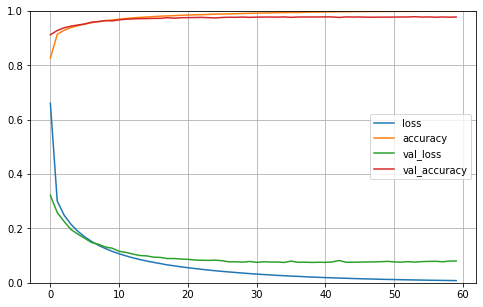

In [ ]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0738 - accuracy: 0.9794


[0.07376761734485626, 0.9793999791145325]

In [ ]:
X_new = X_test[:5]

In [ ]:
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = model.predict(X_new)
y_pred

array([[1.20337020e-07, 2.07988582e-09, 1.81925327e-06, 6.05154601e-05,
        7.36475048e-10, 2.04654484e-07, 3.21777246e-13, 9.99926090e-01,
        8.25253267e-07, 1.03299853e-05],
       [1.90820559e-09, 5.92069114e-07, 9.99998093e-01, 1.33825745e-06,
        1.25148260e-15, 1.66231584e-10, 7.90063748e-09, 5.70272873e-17,
        1.31182745e-08, 8.44633214e-18],
       [1.26128759e-06, 9.99405503e-01, 9.25203312e-06, 1.73710941e-06,
        2.28048215e-04, 1.92243465e-06, 1.57714130e-05, 2.53643317e-04,
        8.16969259e-05, 1.13552869e-06],
       [9.99998927e-01, 3.98276292e-08, 3.21891605e-07, 1.13750764e-09,
        1.56162514e-08, 6.59744259e-10, 3.30513302e-07, 3.01289873e-07,
        4.06150114e-12, 1.44430771e-07],
       [7.86818816e-07, 1.18469954e-08, 1.31028273e-08, 1.24133537e-10,
        9.98786271e-01, 3.60190699e-09, 6.91118146e-07, 2.67260725e-06,
        2.45922877e-07, 1.20923633e-03]], dtype=float32)

In [ ]:
y_pred = model.predict(X_new)
y_pred_classes = np.argmax(y_pred,axis = 1) 

In [ ]:
print(y_pred_classes)

[7 2 1 0 4]


AxesImage(54,36;334.8x217.44)


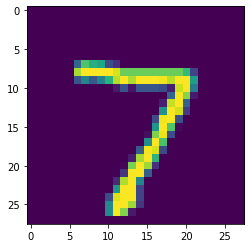

In [ ]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


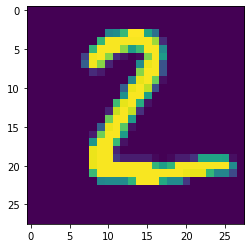

In [ ]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


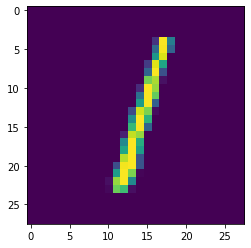

In [ ]:
print(plt.imshow(X_test[2]))

AxesImage(54,36;334.8x217.44)


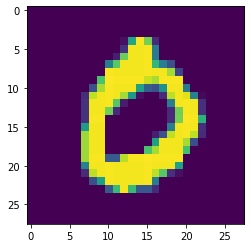

In [ ]:
print(plt.imshow(X_test[3]))

AxesImage(54,36;334.8x217.44)


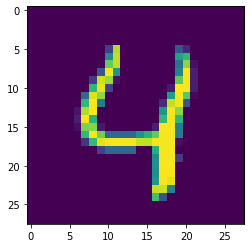

In [ ]:
print(plt.imshow(X_test[4]))